# Standard marxan output analysis 
### Based on the British Columbia example (Pacmara Tutorial)

Date: 26 Jan 2021  
Author: Tamara

## Requirements

In [83]:
%run marxan_utils.ipynb

In [24]:
MARXAN_FOLDER = '/home/jovyan/work/datasets/raw/demo_British_Columbia/British_Columbia'
MARXAN_INPUTDATA = 'input.dat'

In [25]:
## INPUT FILES used to RUN marxan
pu_area = gpd.read_file(f'{MARXAN_FOLDER}/pu/pulayer.shp')

<AxesSubplot:>

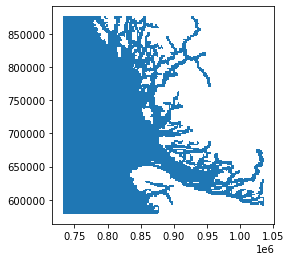

In [26]:
pu_area.plot()

### 3. BLM calibration

 --> Running BLM_0.001...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 6 Best score: 1.37203e+06
 --> Running BLM_0.01...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 7 Best score: 1.5821e+06
 --> Running BLM_0.1...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 6 Best score: 2.43185e+06
 --> Running BLM_1...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthe

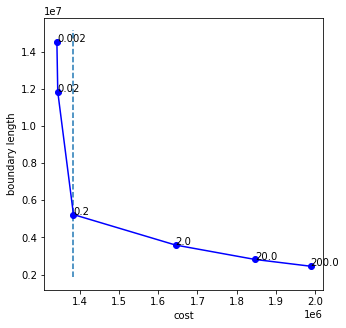

In [74]:
grid_file_path = f'{MARXAN_FOLDER}/pu/pulayer.shp'
blm = BLM_calibration(MARXAN_FOLDER,'input.dat',grid_file_path )

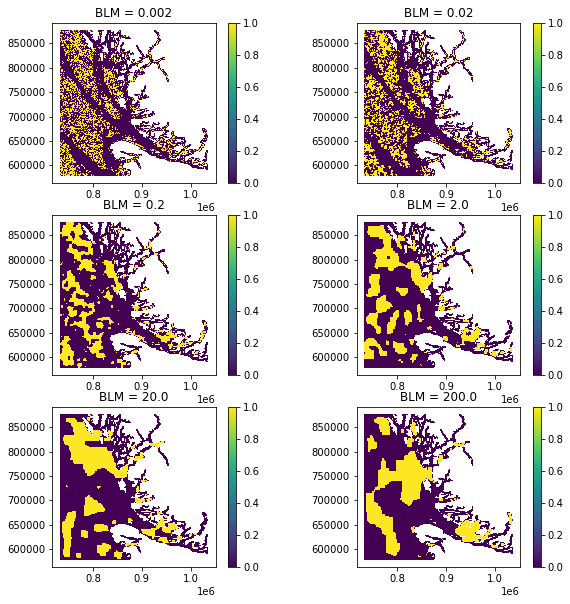

In [69]:
plotClumping(MARXAN_FOLDER,'input.dat',grid_file_path)

## Execute Marxan 

In [77]:
pumock = modify_pu_status(MARXAN_FOLDER,MARXAN_INPUTDATA,percentage= 0.5, lock_out =True)

userInput = readInput(MARXAN_FOLDER,MARXAN_INPUTDATA)
userInput.BLM = blm
userInput.PUNAME = 'pumock.dat'
userInput.OUTPUTDIR = 'output_mock'
os.mkdir(f'{MARXAN_FOLDER}/{userInput.OUTPUTDIR}')
saveInput(MARXAN_FOLDER,MARXAN_INPUTDATA,userInput)


In [ ]:
execute_marxan(MARXAN_FOLDER)

### SCENARIO OUTPUTS

### 1) Best solution/Indivdual solutions

<AxesSubplot:>

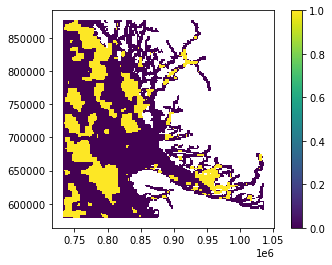

In [71]:
## Intersect best (or any individual solution) with PU grid
best = validateFile(MARXAN_FOLDER,'input.dat',OutputRun)
sol_grid = pu_area.merge(best,left_on='PUID',right_on = 'PUID',how='inner')
sol_grid.plot(column='SOLUTION', legend=True)

### 2) Frequency map

<AxesSubplot:>

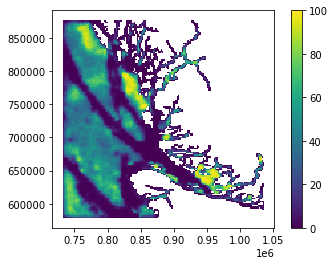

In [72]:
## Intersect with PU grid
freq = validateFile(MARXAN_FOLDER,'input.dat',OutputSsoln)
freq_grid = pu_area.merge(freq,left_on='PUID',right_on = 'planning_unit',how='inner')
freq_grid.plot(column='number', legend=True)

<AxesSubplot:>

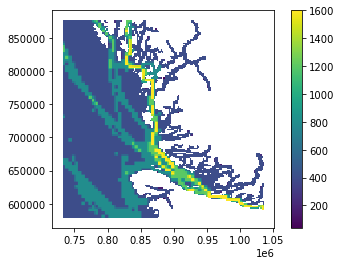

In [9]:
##Compare with cost surface
cost = pu_area.merge(pu,left_on='PUID',right_on = 'id',how='inner')
cost.plot(column='cost',legend=True)

### 3) 5 most different solutions

In [12]:
bestsols= clusterSolutions(MARXAN_FOLDER,MARXAN_INPUTDATA,k=5)
bestsols

Overall best solution is 9


[27, 15, 29, 61, 9]

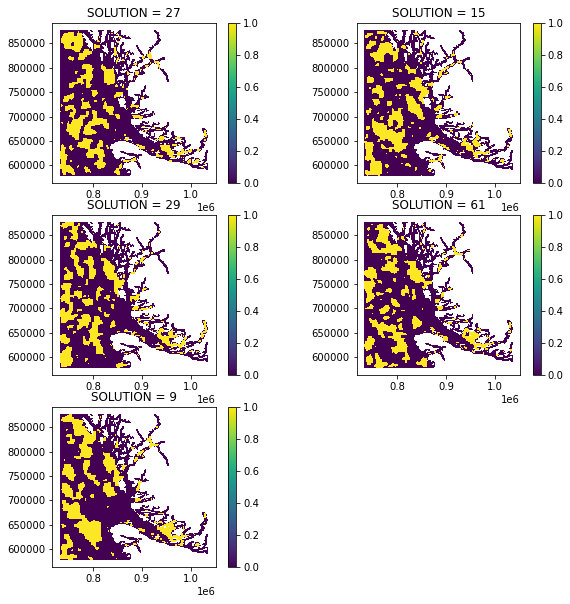

In [15]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig = plt.figure(figsize=(10,10))

for idx, sol in enumerate(bestsols):
    axn = fig.add_subplot(321+idx)
    solution = pd.read_csv(f"{MARXAN_FOLDER}/output/output_r{str(sol).zfill(5)}.csv")
    solution_grid = pu_area.merge(solution,left_on='PUID',right_on = 'PUID',how='inner')
    solution_grid.plot(ax=axn,column='SOLUTION', legend=True)
    axn.set_title(f'SOLUTION = {sol}')

#### Summary info 5 most different solutions

In [16]:
summary = validateFile(MARXAN_FOLDER,'input.dat',OutputSum)
sum_diff =summary[summary['Run_Number'].isin(bestsols)]
sum_diff

,Run_Number,Score,Cost,Planning_Units,Connectivity,Connectivity_Total,Connectivity_In,Connectivity_Edge,Connectivity_Out,Connectivity_In_Fraction,Penalty,Shortfall,Missing_Values,MPM
8,9,2.641992e+06,1427496.0,3339,4048000.0,51664000.0,11332000.0,4048000.0,36284000.0,0.219340,95.822087,40000.0,0,0.999739
14,15,2.862352e+06,1451172.0,3327,4700000.0,51664000.0,10958000.0,4700000.0,36006000.0,0.212101,1179.801639,319000.0,0,0.959233
26,27,2.854461e+06,1445488.0,3311,4692000.0,51664000.0,10898000.0,4692000.0,36074000.0,0.210940,1372.958405,134000.0,0,0.980952
28,29,2.895656e+06,1441900.0,3328,4844000.0,51664000.0,10890000.0,4844000.0,35930000.0,0.210785,556.229592,320000.0,0,0.998435
60,61,2.839264e+06,1438500.0,3313,4664000.0,51664000.0,10920000.0,4664000.0,36080000.0,0.211366,1564.473609,79000.0,1,0.942857


### 4) GAP Analysis

In [79]:
df = gapAnalysis(MARXAN_FOLDER, 'input.dat')

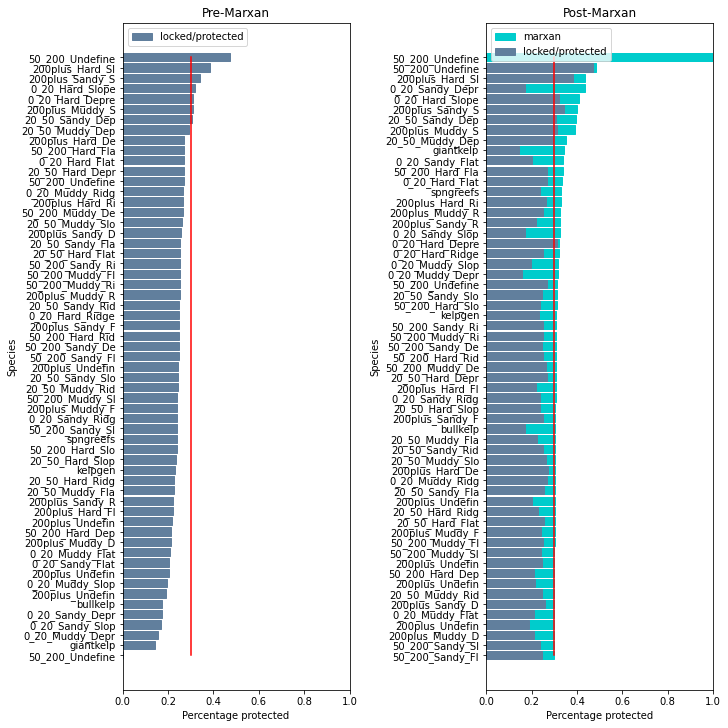

In [80]:
fig, anx = plt.subplots(nrows=1, ncols=2,figsize=(10,10), constrained_layout=True)
plotGap(df, 'Pre-Marxan', anx[0], post_marxan=False)
plotGap(df, 'Post-Marxan', anx[1], post_marxan=True)

In [84]:
unmetDecisionTree(MARXAN_FOLDER, 'input.dat',
                      lock_out_limit=50, 
                      high_cost_quantile= 0.7, 
                      hcost_limit=20)

{'None': 'All targets met'}